# **Importing Libraries**

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# **Data Loading and Exploration**

In [112]:
data = pd.read_excel('Cotton.xlsx')
data.describe()

,date,product_id,by_product_id,province_id,lcu_id,district id,station_id,minimum,maximum
count,71772,71772.0,71772.000000,71772.000000,71772.0,71772.000000,71772.000000,71772.000000,71772.000000
mean,2015-11-21 15:09:51.673633024,1.0,9.939127,4.304311,0.0,61.932007,333.057892,2020.740283,2150.832074
min,2012-01-02 00:00:00,1.0,7.000000,1.000000,0.0,4.000000,2.000000,425.000000,500.000000
25%,2014-09-15 00:00:00,1.0,7.000000,4.000000,0.0,23.000000,157.000000,1300.000000,1333.000000
50%,2016-02-02 12:00:00,1.0,11.000000,4.000000,0.0,72.000000,344.000000,1650.000000,1725.000000
75%,2017-08-01 00:00:00,1.0,13.000000,5.000000,0.0,95.000000,526.000000,2793.007000,3000.000000
max,2017-12-30 00:00:00,1.0,13.000000,5.000000,0.0,115.000000,654.000000,5150.000000,5150.000000
std,NaN,0.0,2.613201,0.623069,0.0,39.241438,196.692666,922.521351,975.505239


In [113]:
data.shape

(71772, 13)

In [114]:
data.head(5)

,date,product_id,product_en,by_product_id,by_product_en,province_id,lcu_id,province_en,district id,station_id,station_en,minimum,maximum
0,2012-01-02,1,Cotton,7,phutty,5,0,Sindh,4,26,Badin,1871.005917,2371.065089
1,2012-01-02,1,Cotton,7,phutty,5,0,Sindh,19,107,Dadu,1800.000000,2100.000000
2,2012-01-02,1,Cotton,7,phutty,5,0,Sindh,24,184,Ghotki,2000.000000,2300.000000
3,2012-01-02,1,Cotton,7,phutty,5,0,Sindh,32,217,Hyderabad,1800.000000,2100.000000
4,2012-01-02,1,Cotton,7,phutty,5,0,Sindh,36,447,Jamshoro,1800.000000,2100.000000


In [115]:
data.dtypes

date             datetime64[ns]
product_id                int64
product_en               object
by_product_id             int64
by_product_en            object
province_id               int64
lcu_id                    int64
province_en              object
district id               int64
station_id                int64
station_en               object
minimum                 float64
maximum                 float64
dtype: object

In [116]:
data['date'] = pd.to_datetime(data['date'])
id_cols = ['product_id', 'by_product_id', 'province_id', 'lcu_id', 'district id', 'station_id']
for col in id_cols:
    data[col] = data[col].astype(int)
cat_cols = ['product_en', 'by_product_en', 'province_en', 'station_en']
for col in cat_cols:
    data[col] = data[col].astype('category')
min_max_cols = ['minimum', 'maximum']
for col in min_max_cols:
    data[col] = data[col].astype(float)
data.dtypes

date             datetime64[ns]
product_id                int64
product_en             category
by_product_id             int64
by_product_en          category
province_id               int64
lcu_id                    int64
province_en            category
district id               int64
station_id                int64
station_en             category
minimum                 float64
maximum                 float64
dtype: object

In [117]:
data.isna().sum()

date             0
product_id       0
product_en       0
by_product_id    0
by_product_en    0
province_id      0
lcu_id           0
province_en      0
district id      0
station_id       0
station_en       0
minimum          0
maximum          0
dtype: int64

# **EDA**

In [118]:
data['month_year'] = data['date'].dt.to_period('M')

## **Line Graph**

In [119]:
def plot_bp(bp_name):
  filtered_data = data[data['by_product_en'] == bp_name]

  grouped = filtered_data.groupby('month_year').agg(min_min=('minimum', 'min'), max_max=('maximum', 'max'))

  # Plotting
  plt.figure(figsize=(25, 5))
  plt.plot(grouped.index.astype(str), grouped['min_min'], label='Min of Minimum', marker='o')
  plt.plot(grouped.index.astype(str), grouped['max_max'], label='Max of Maximum', marker='o')
  plt.title(f'Trend for {bp_name}')
  plt.xlabel('Month-Year')
  plt.ylabel('Price')
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=90)
  plt.tight_layout()  # Adjust subplots to give some padding
  plt.show()

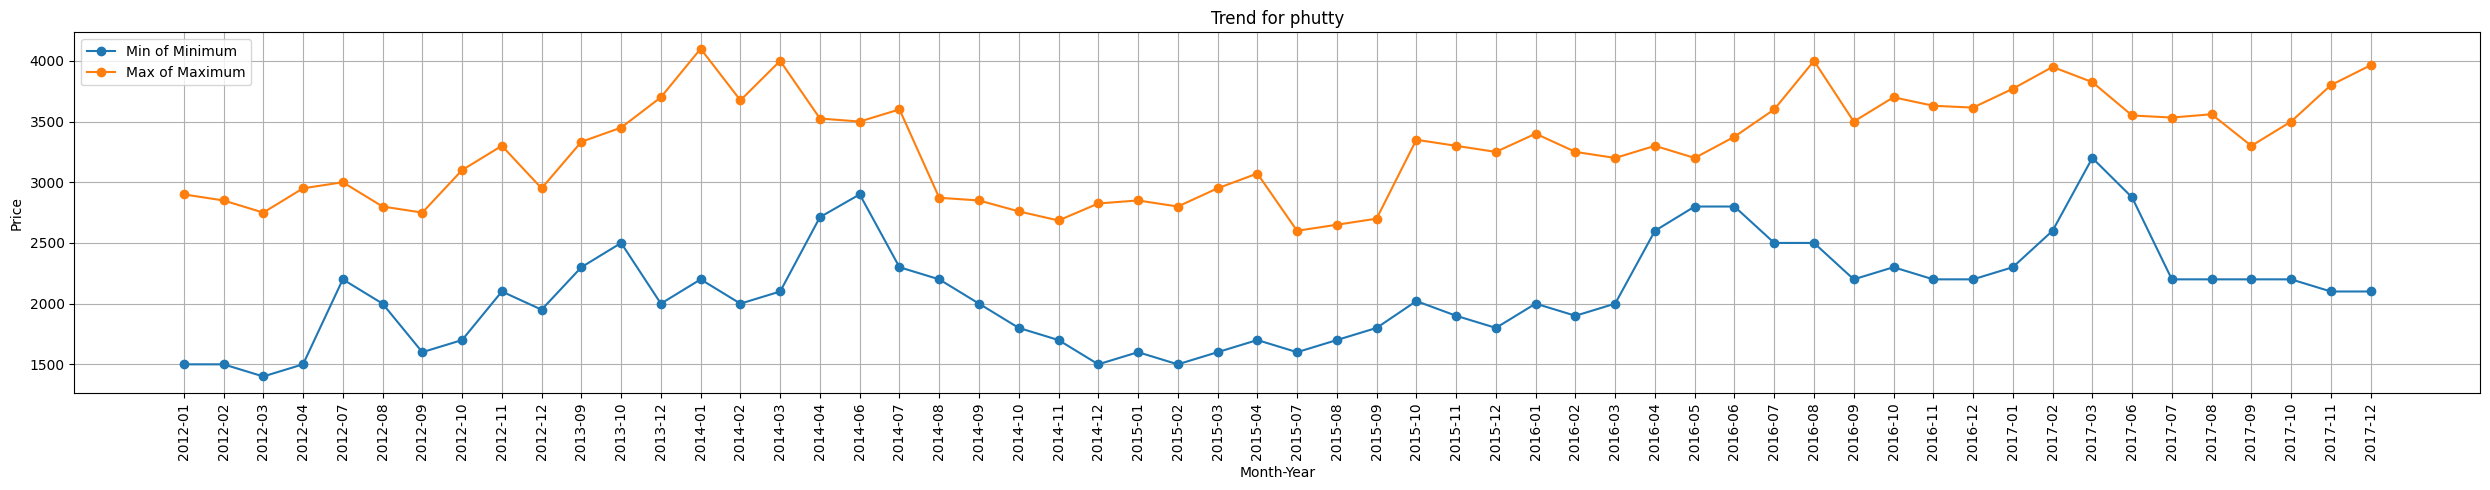

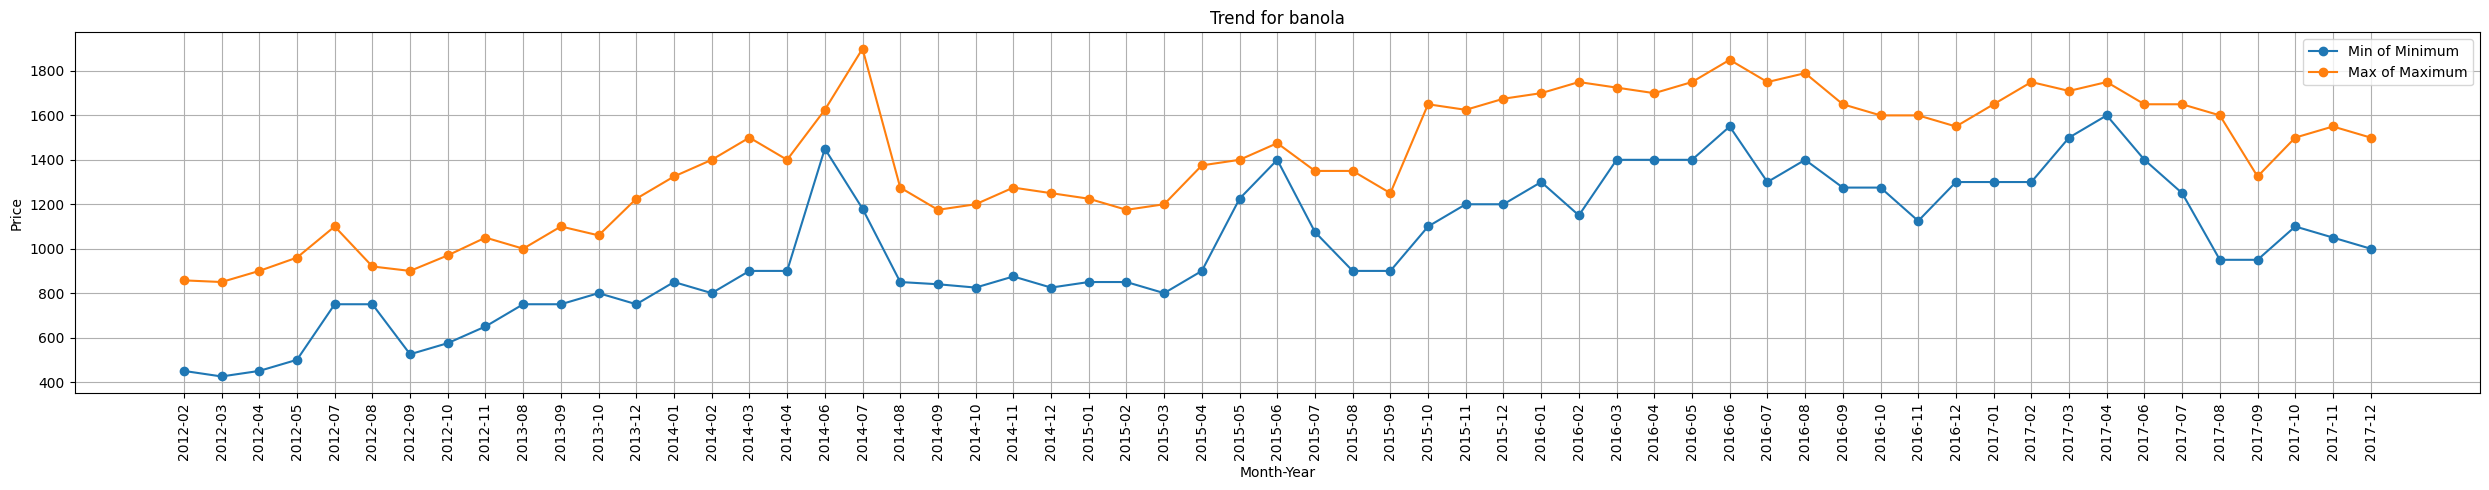

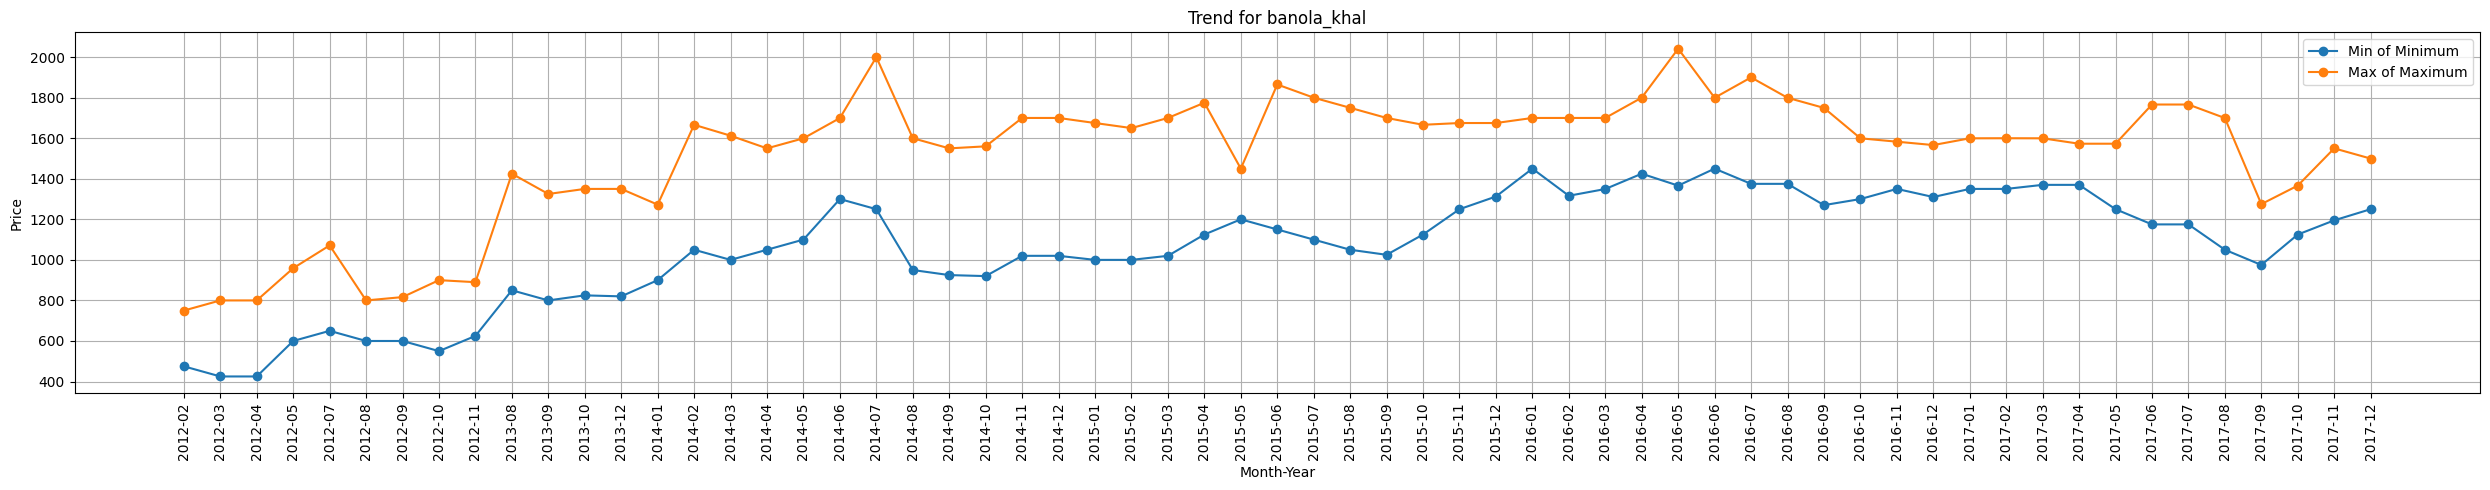

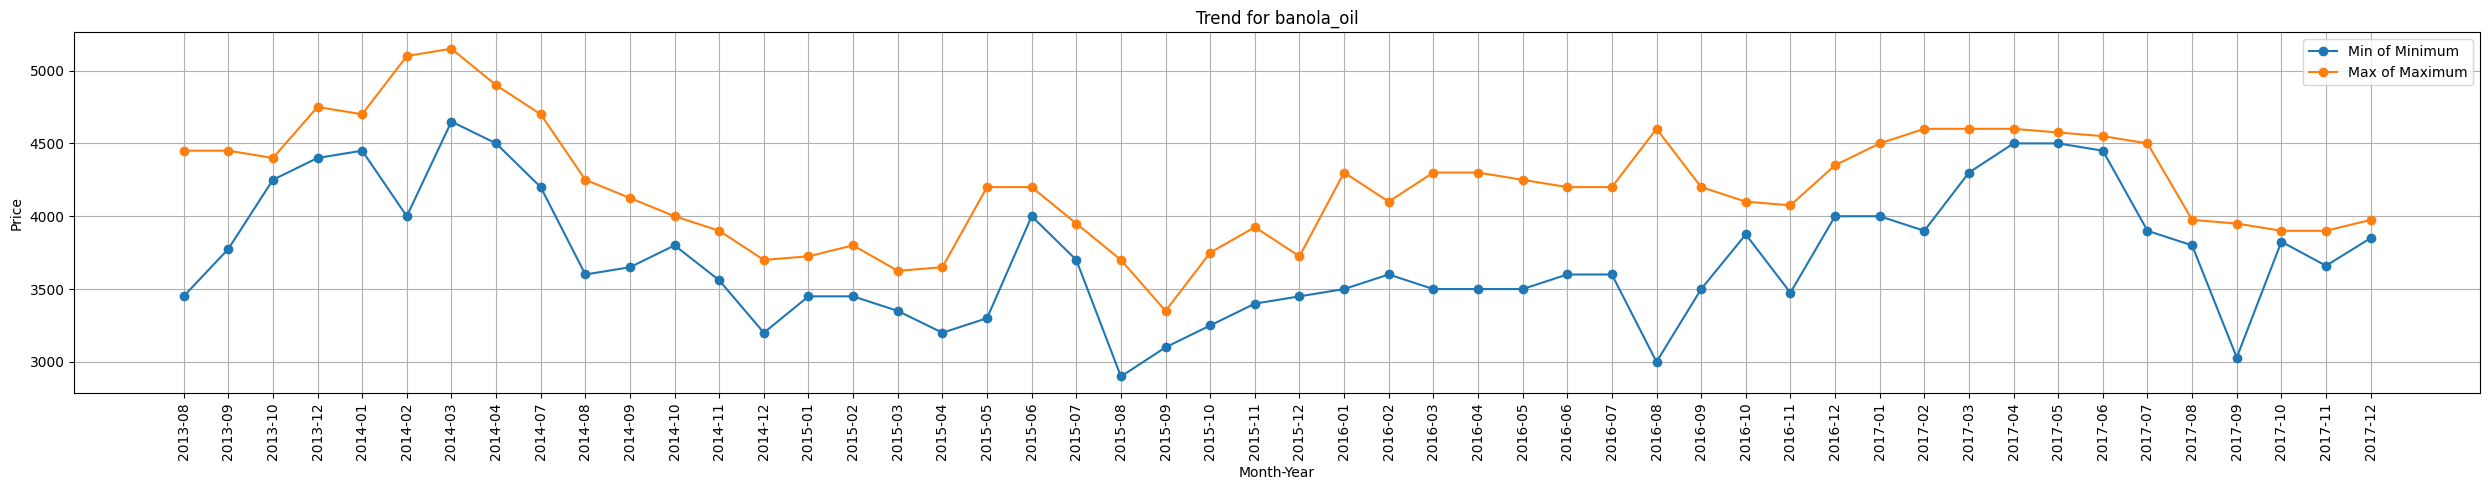

In [120]:
by_products = data['by_product_en'].unique()
for by_product in by_products:
    plot_bp(by_product)

## **Box Plots of By-Products Prices**

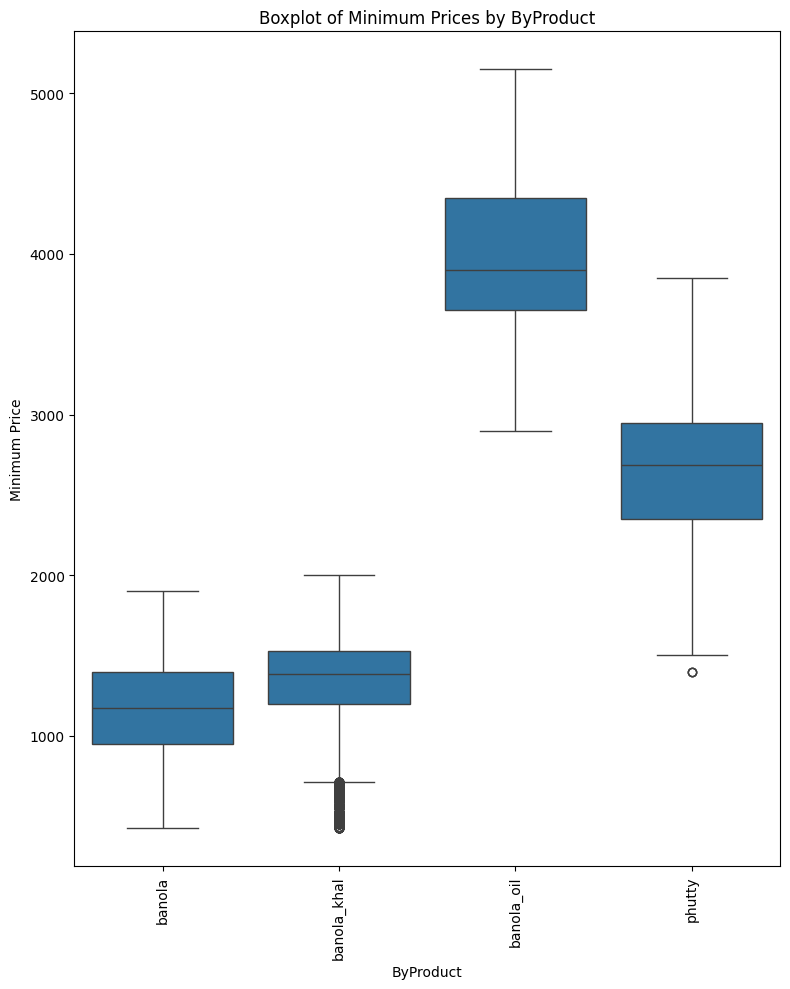

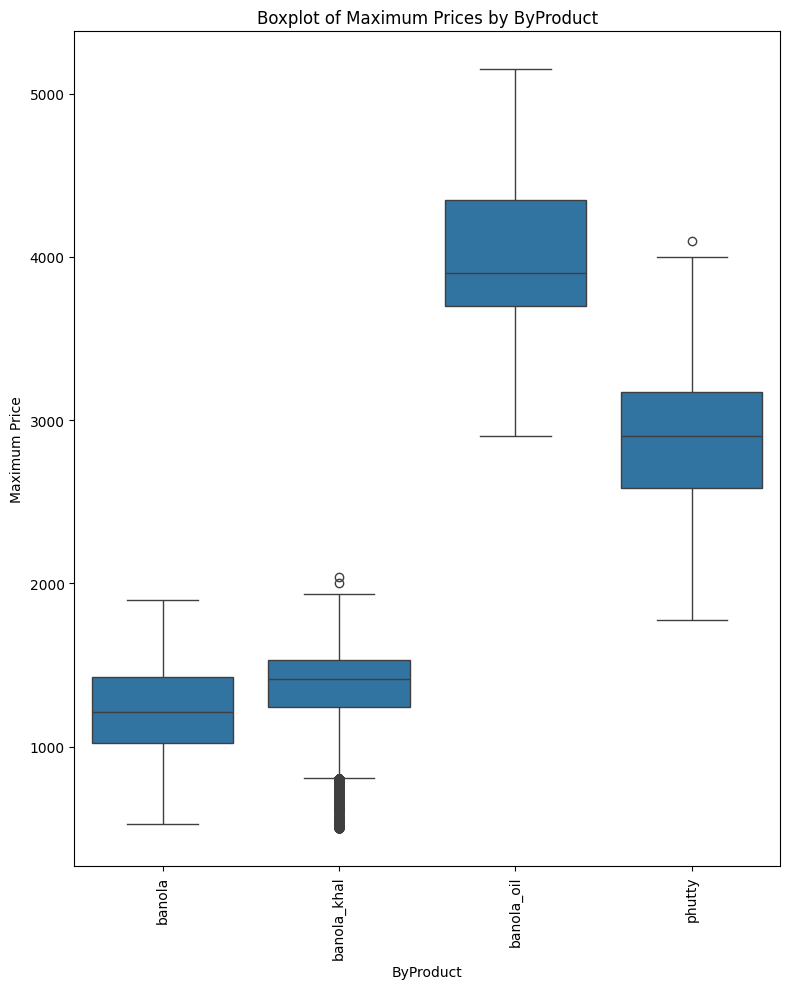

In [121]:
def box_plot_by_product():
    plt.figure(figsize=(8, 10))
    sns.boxplot(x='by_product_en', y='minimum', data=data)
    plt.title('Boxplot of Minimum Prices by ByProduct')
    plt.xticks(rotation=90)
    plt.xlabel('ByProduct')
    plt.ylabel('Minimum Price')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 10))
    sns.boxplot(x='by_product_en', y='maximum', data=data)
    plt.title('Boxplot of Maximum Prices by ByProduct')
    plt.xticks(rotation=90)
    plt.xlabel('ByProduct')
    plt.ylabel('Maximum Price')
    plt.tight_layout()
    plt.show()

# Create box plots for each ByProduct
box_plot_by_product()

## **By Product Distribution across Stations**

<Figure size 2000x1000 with 0 Axes>

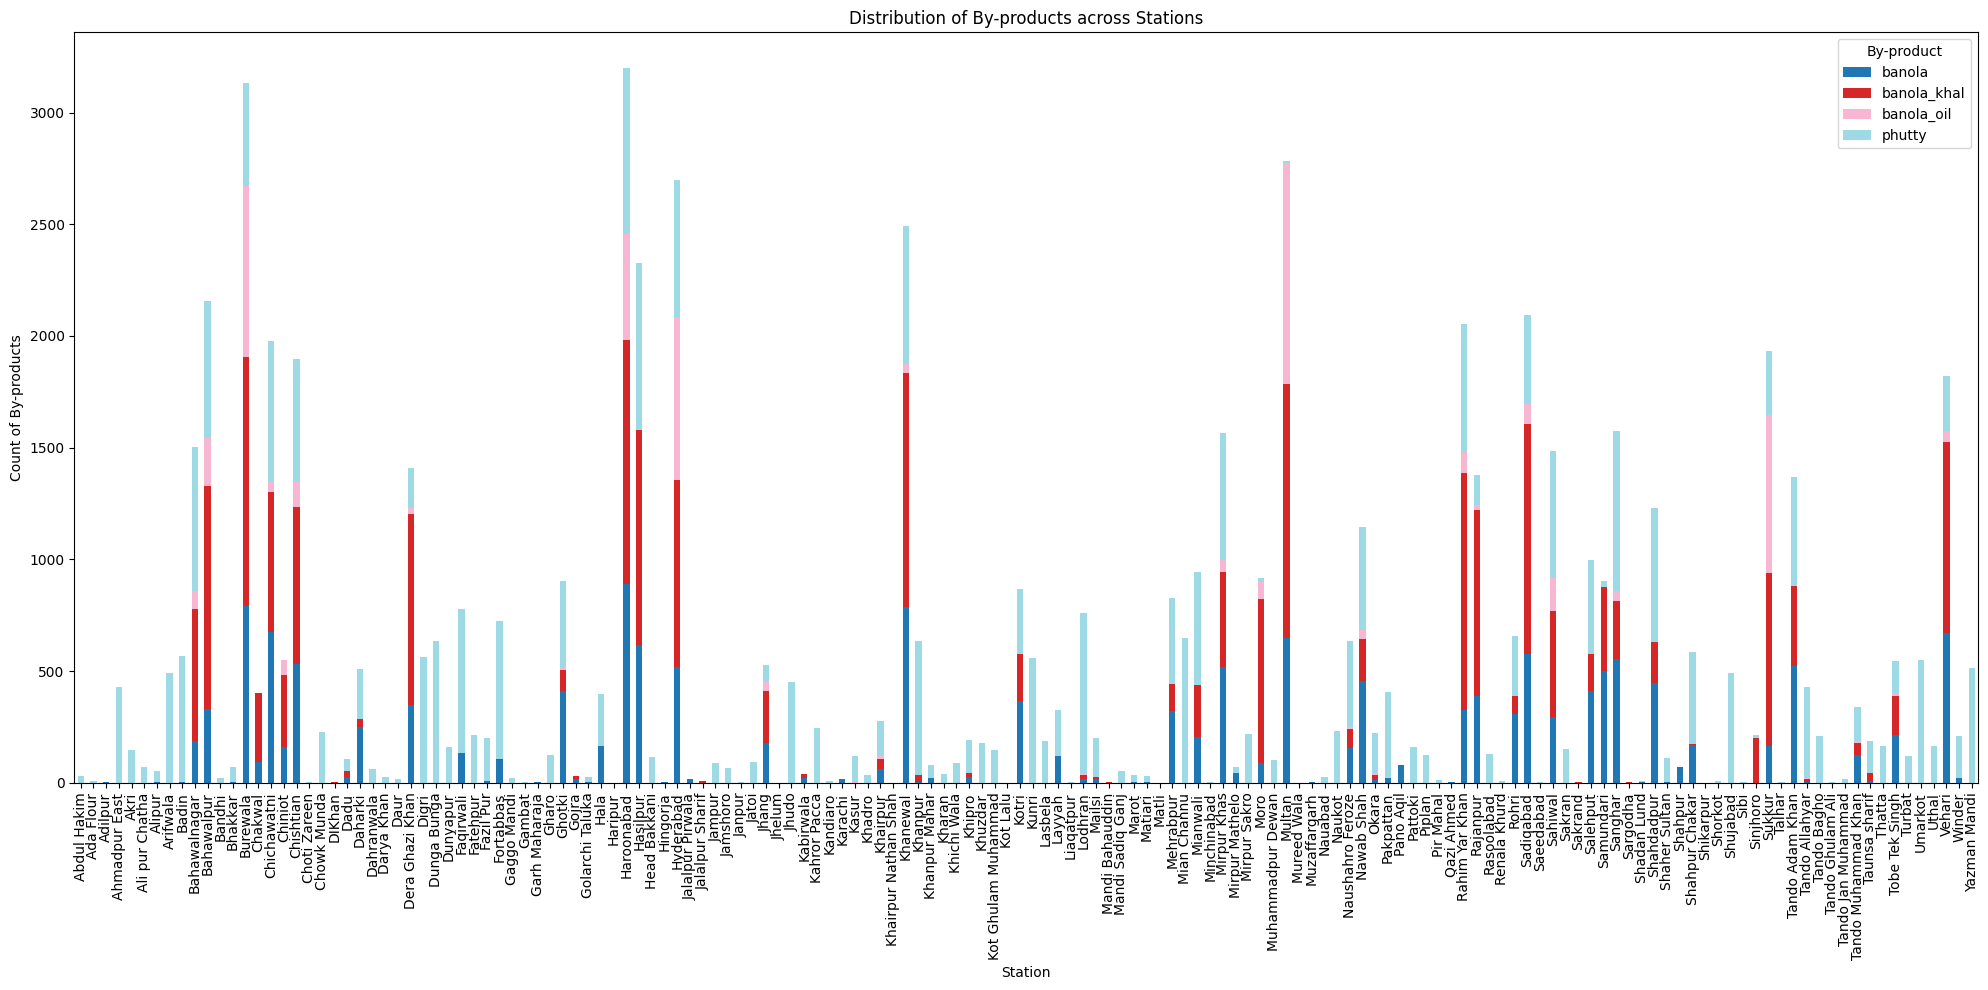

In [122]:
def plot_byproduct_distribution(data):
    crosstab = pd.crosstab(data['station_en'], data['by_product_en'])
    plt.figure(figsize=(20, 10))
    crosstab.plot(kind='bar', stacked=True, figsize=(20, 10), colormap='tab20')
    
    plt.title('Distribution of By-products across Stations')
    plt.xlabel('Station')
    plt.ylabel('Count of By-products')
    plt.xticks(rotation=90)
    plt.legend(title='By-product')
    plt.tight_layout()
    plt.show()

# Call the function to create the plot
plot_byproduct_distribution(data)

## **Box Plot of Prices by Stations**

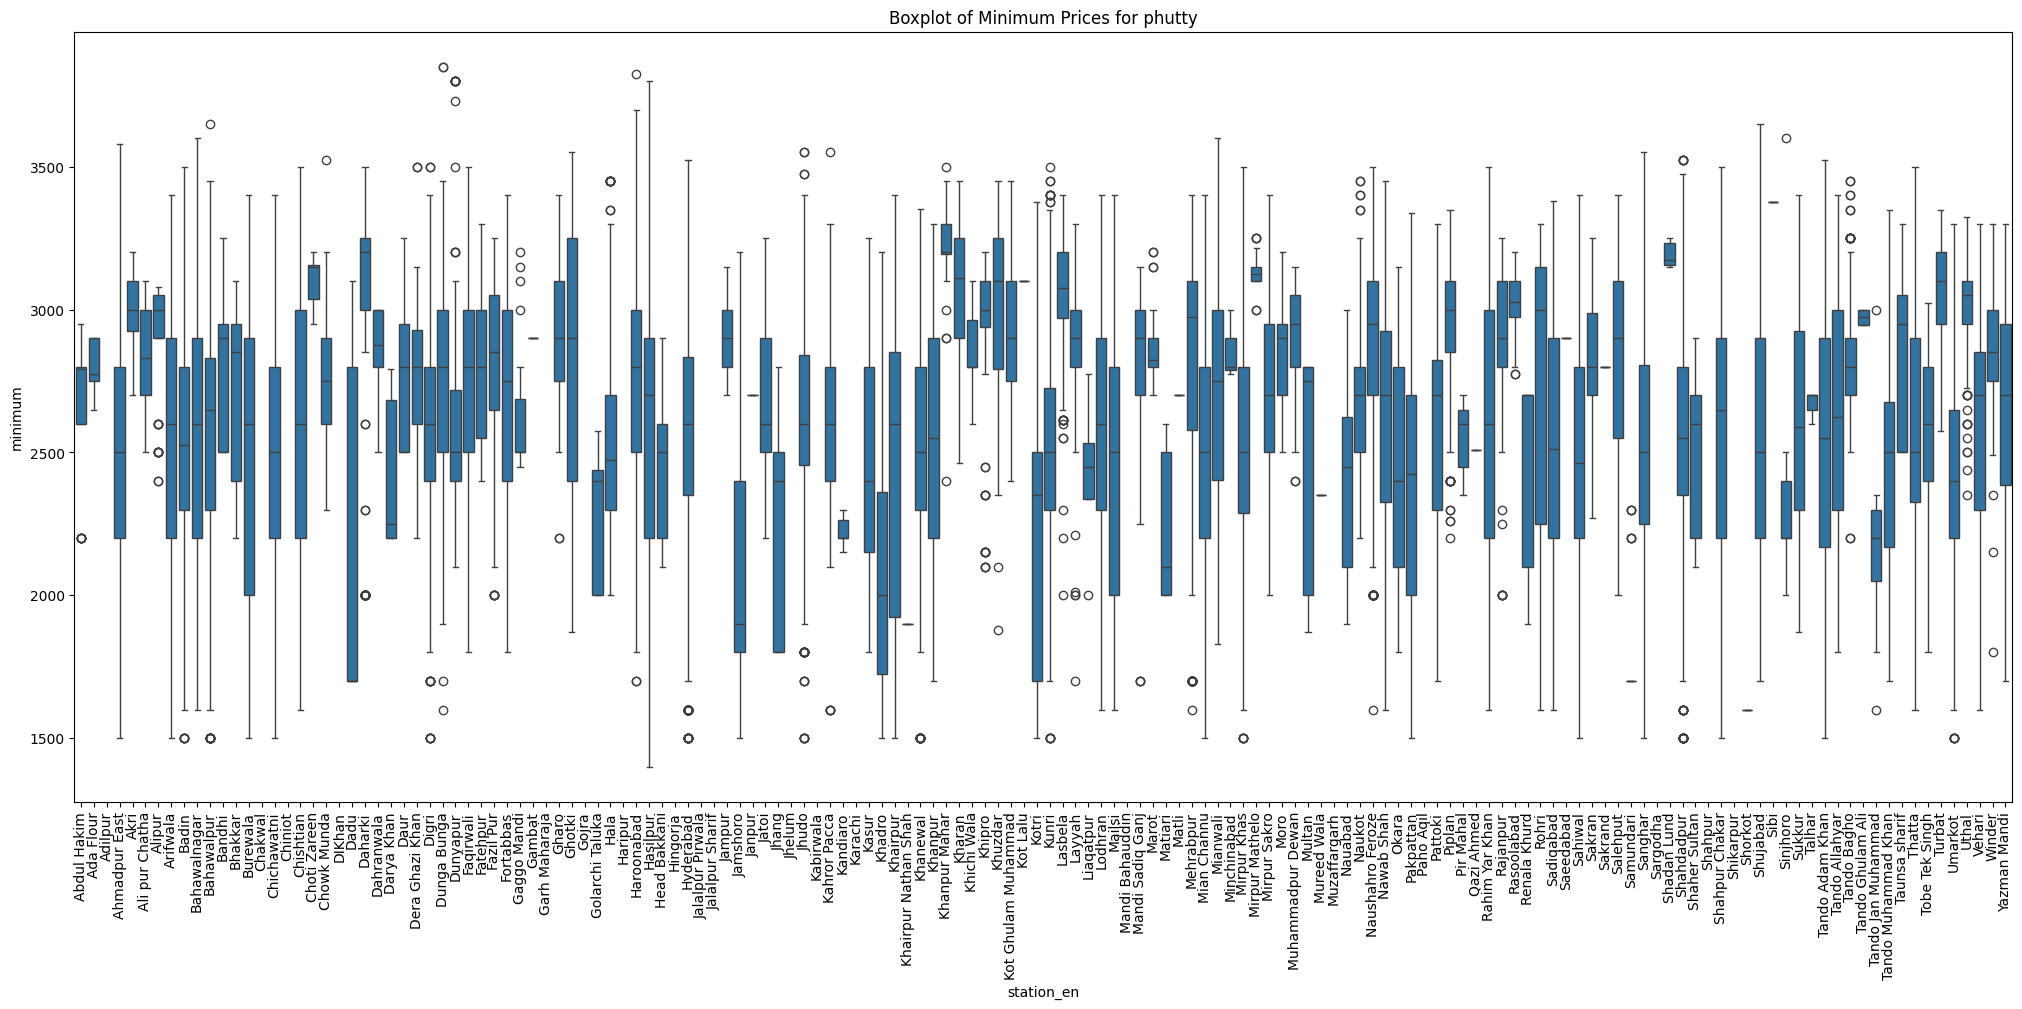

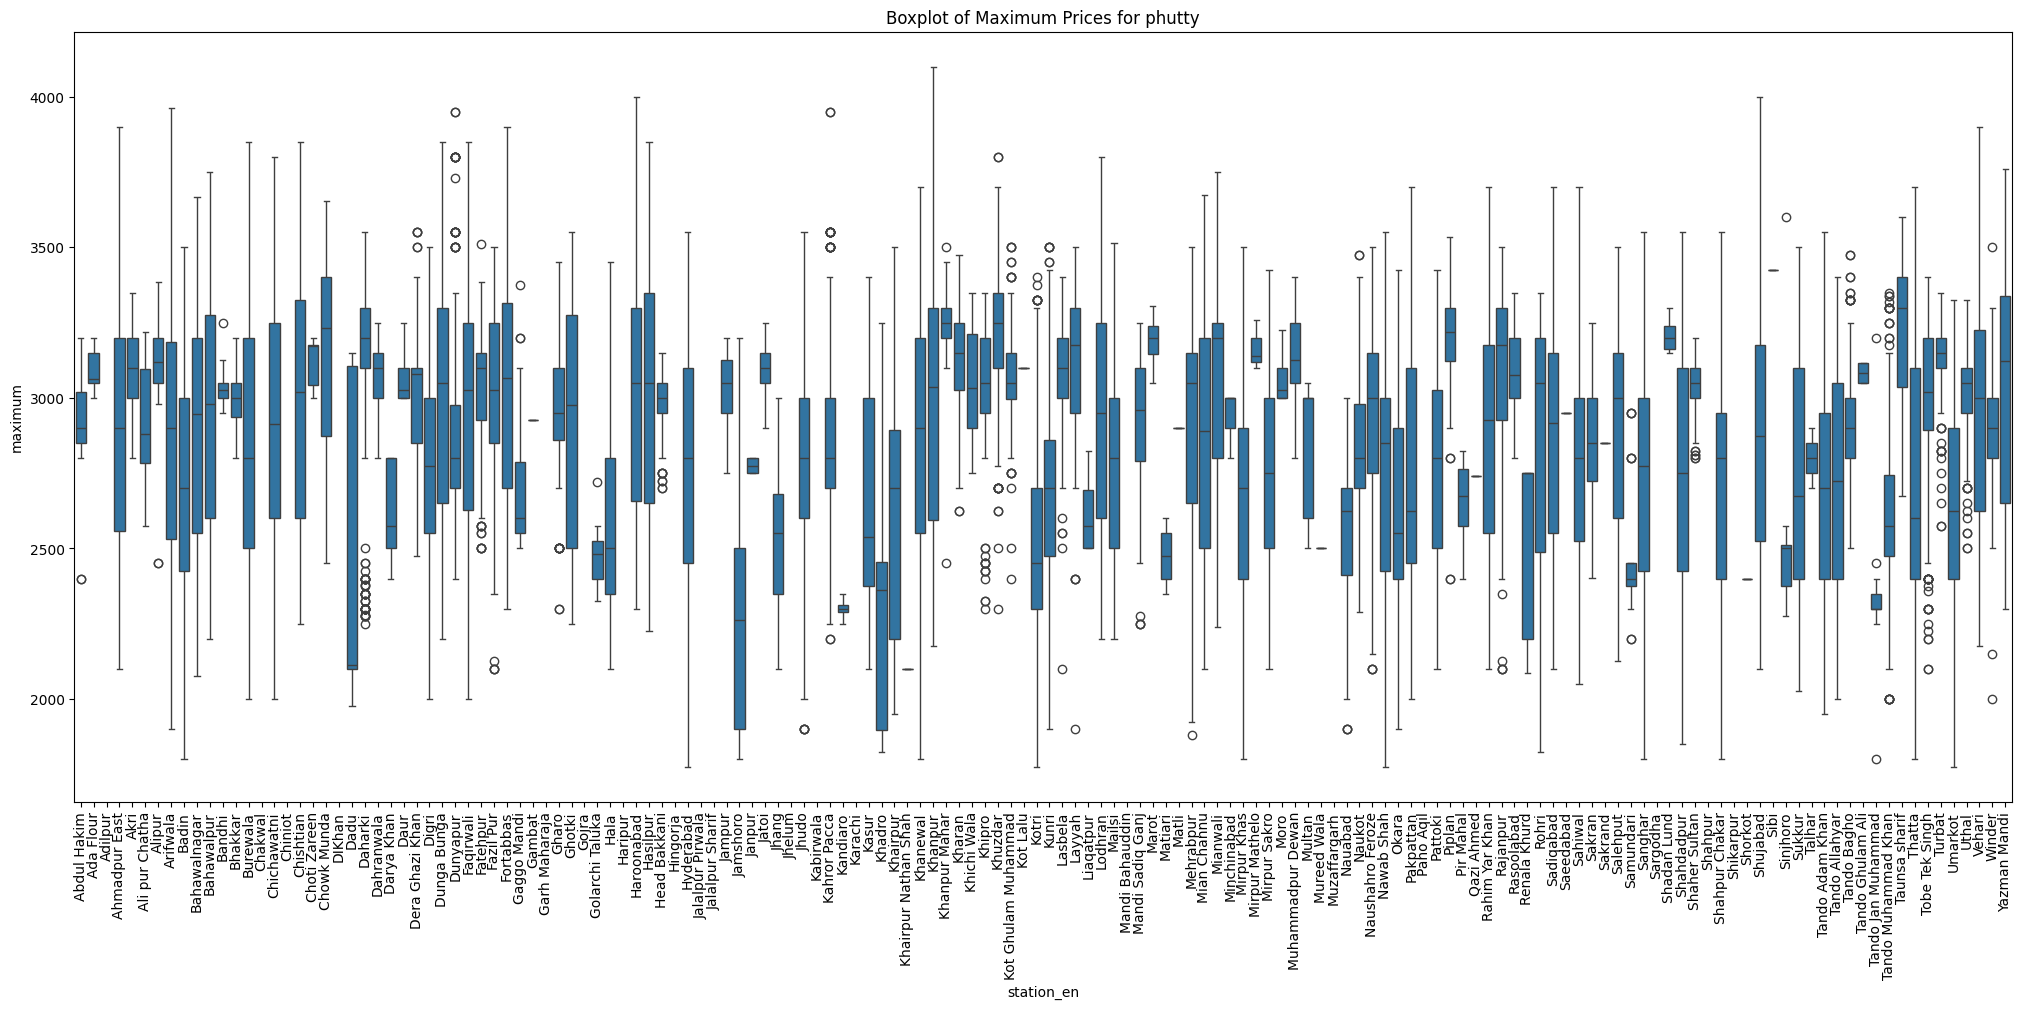

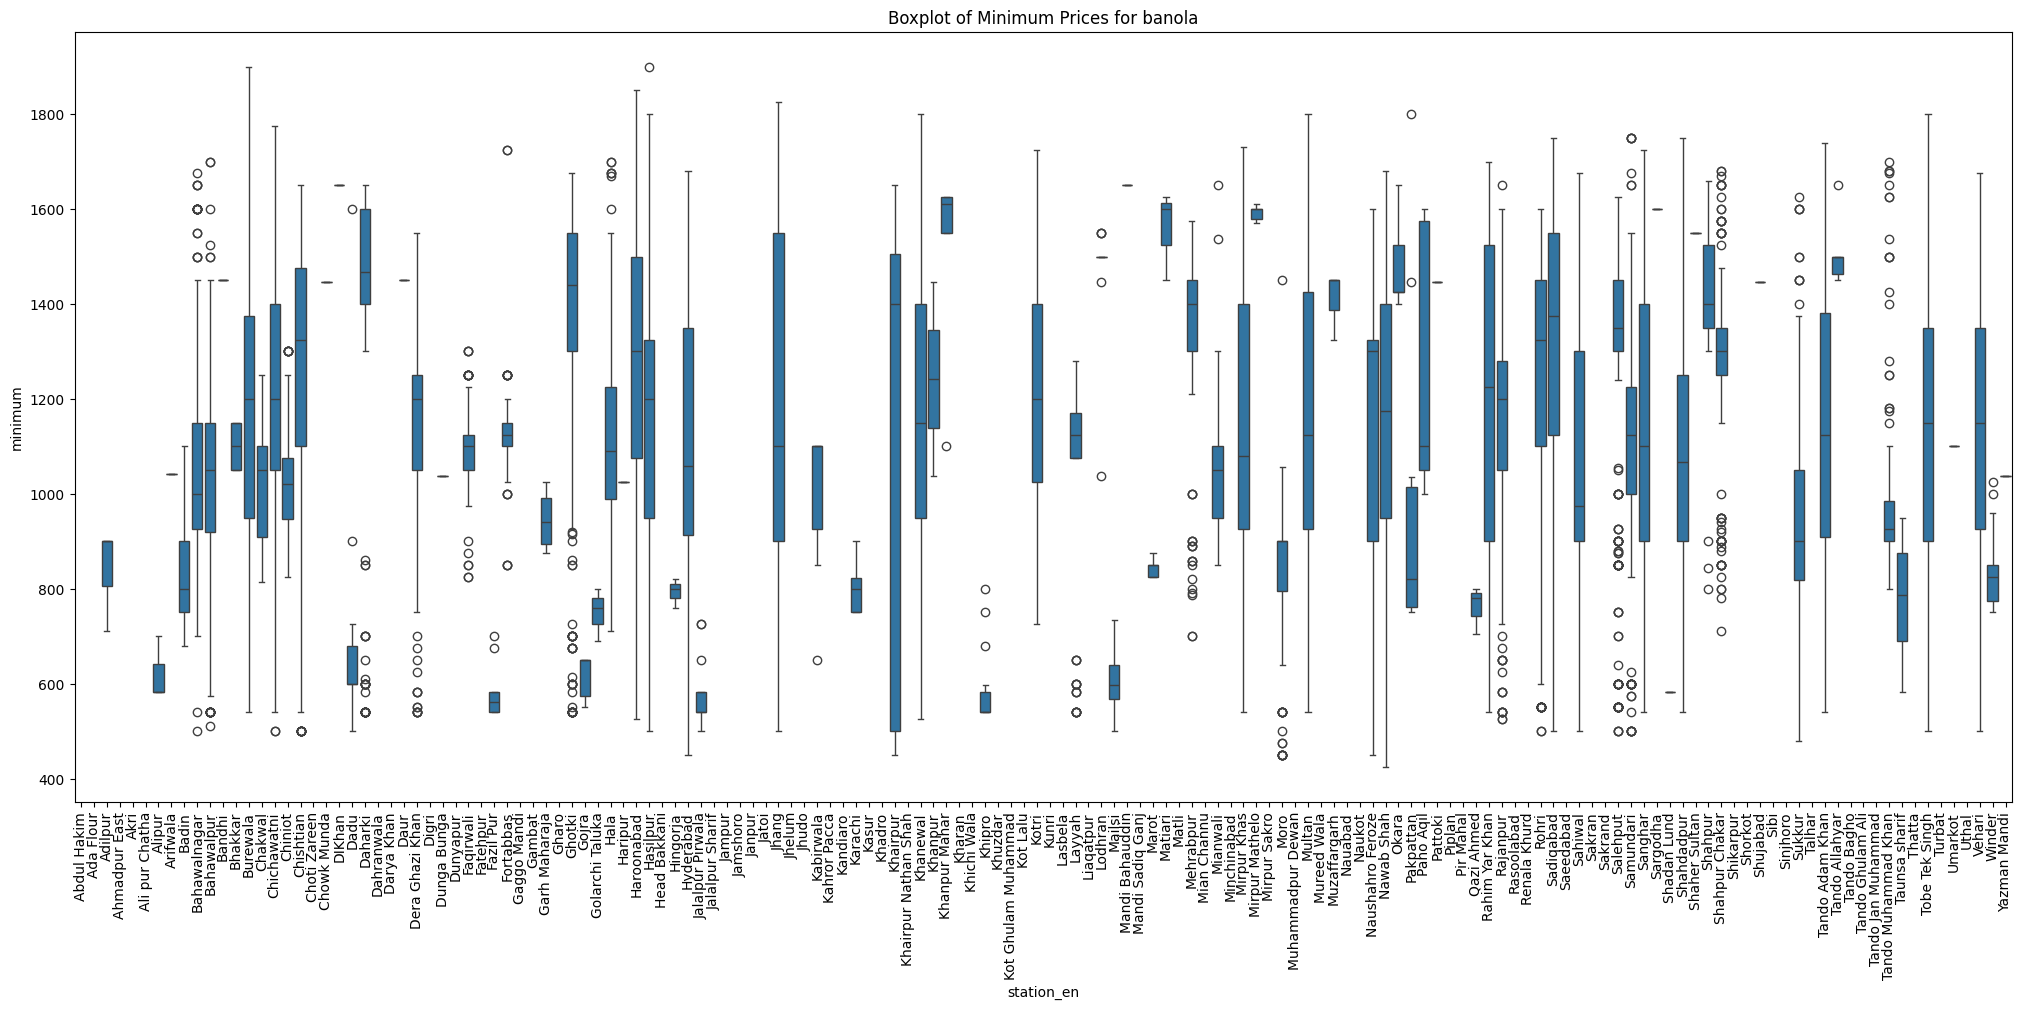

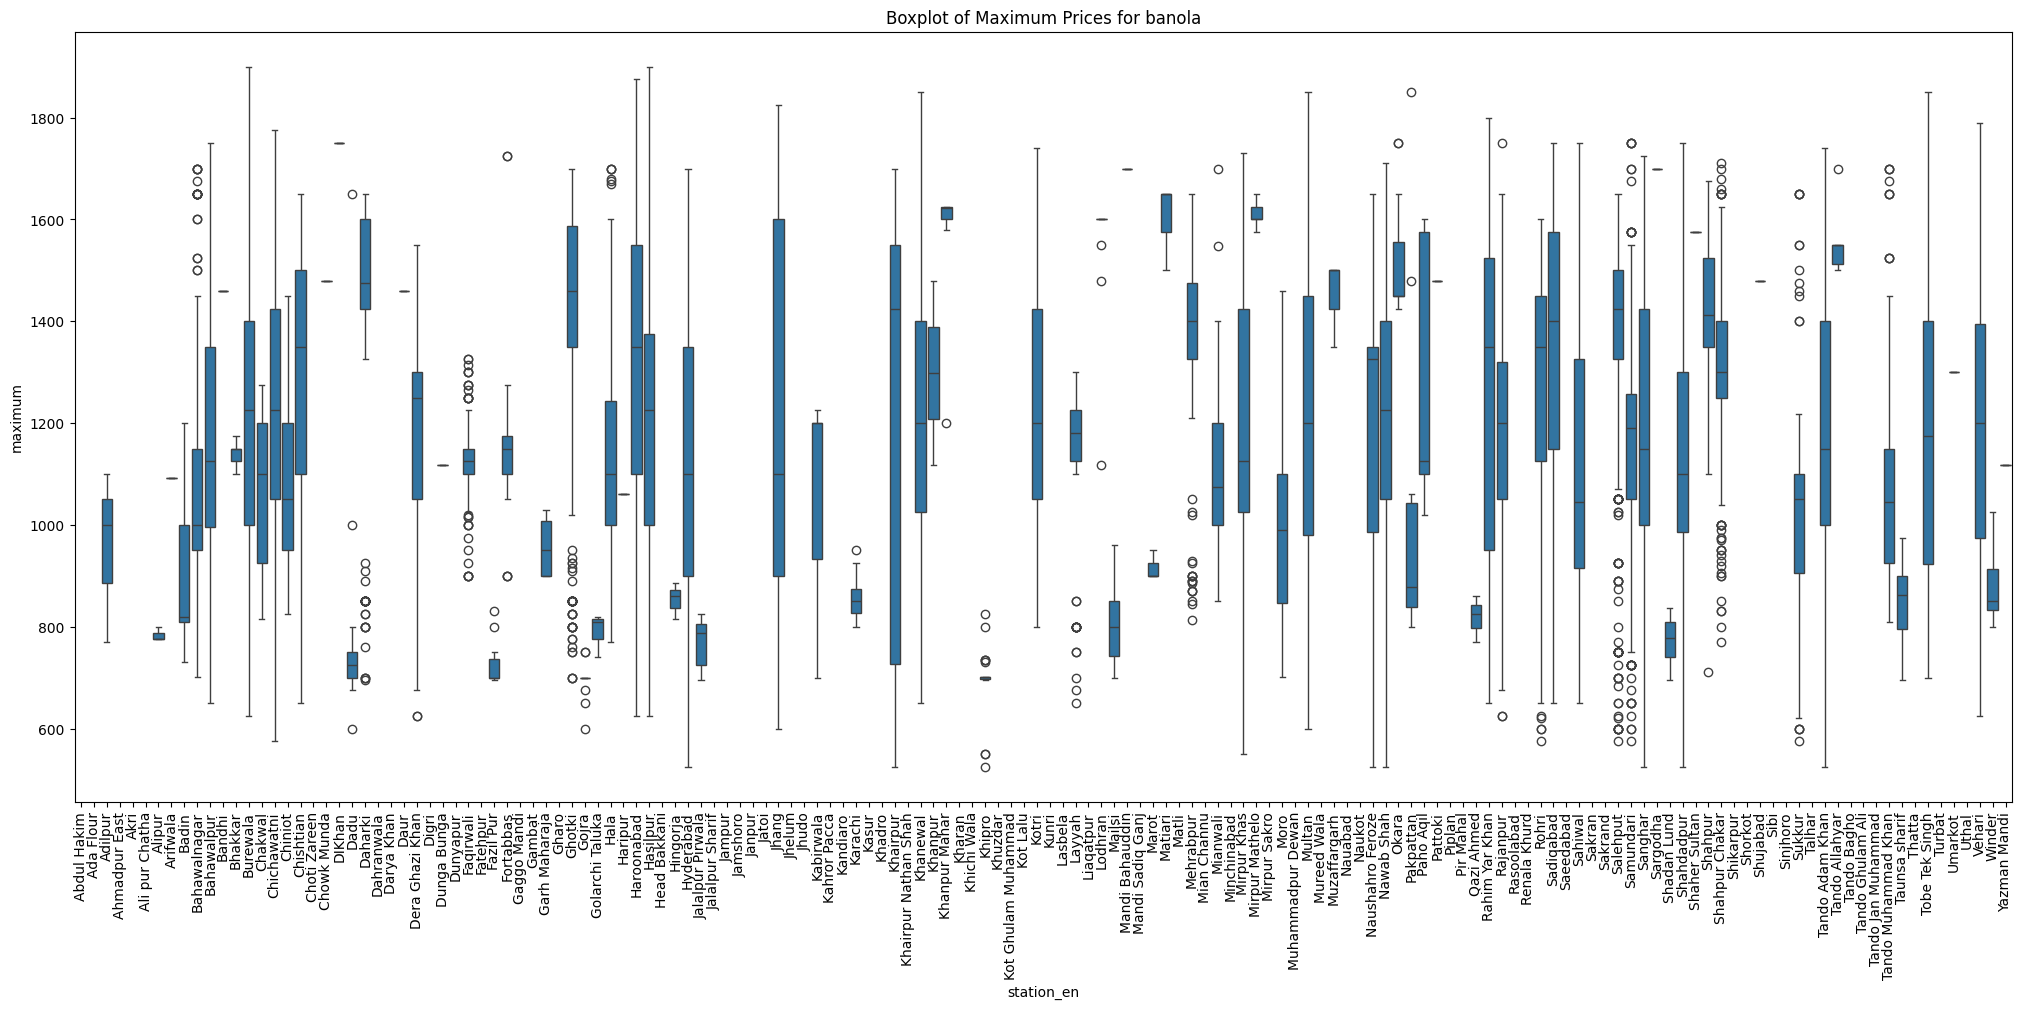

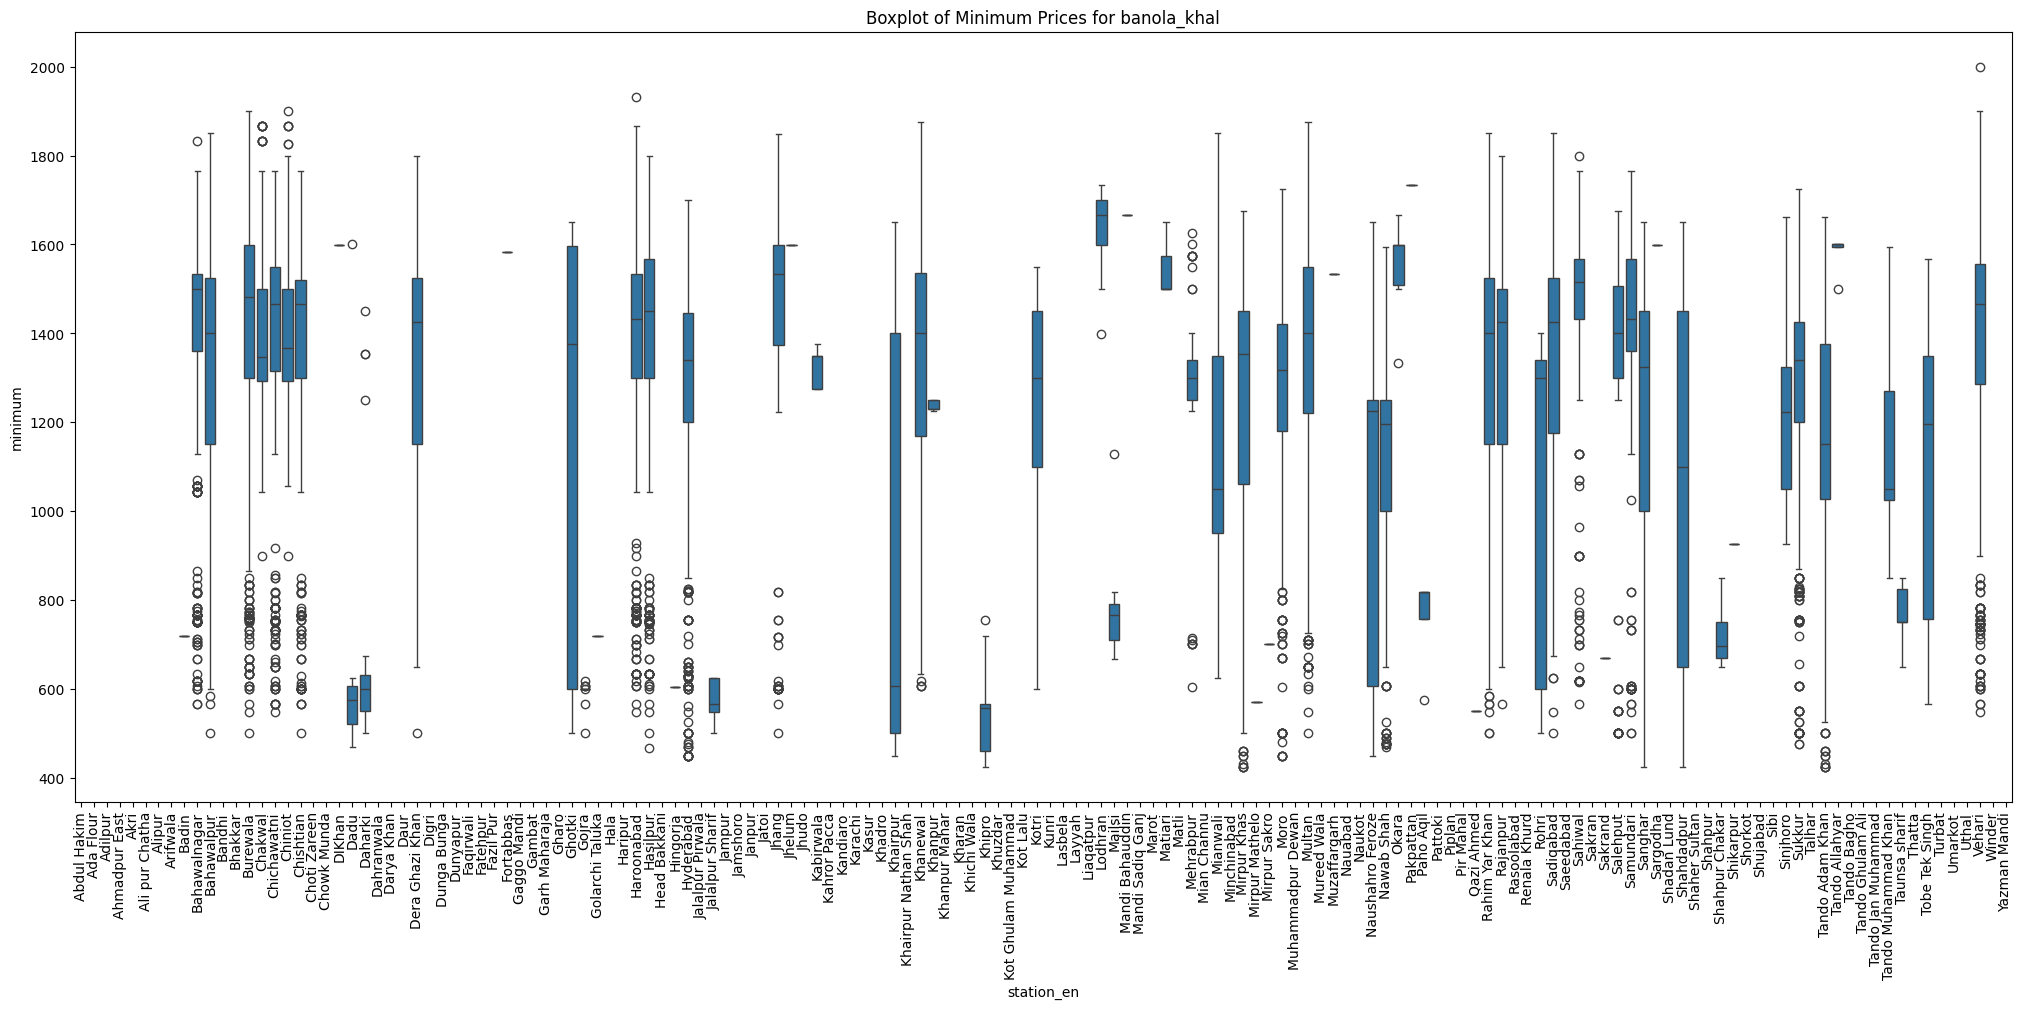

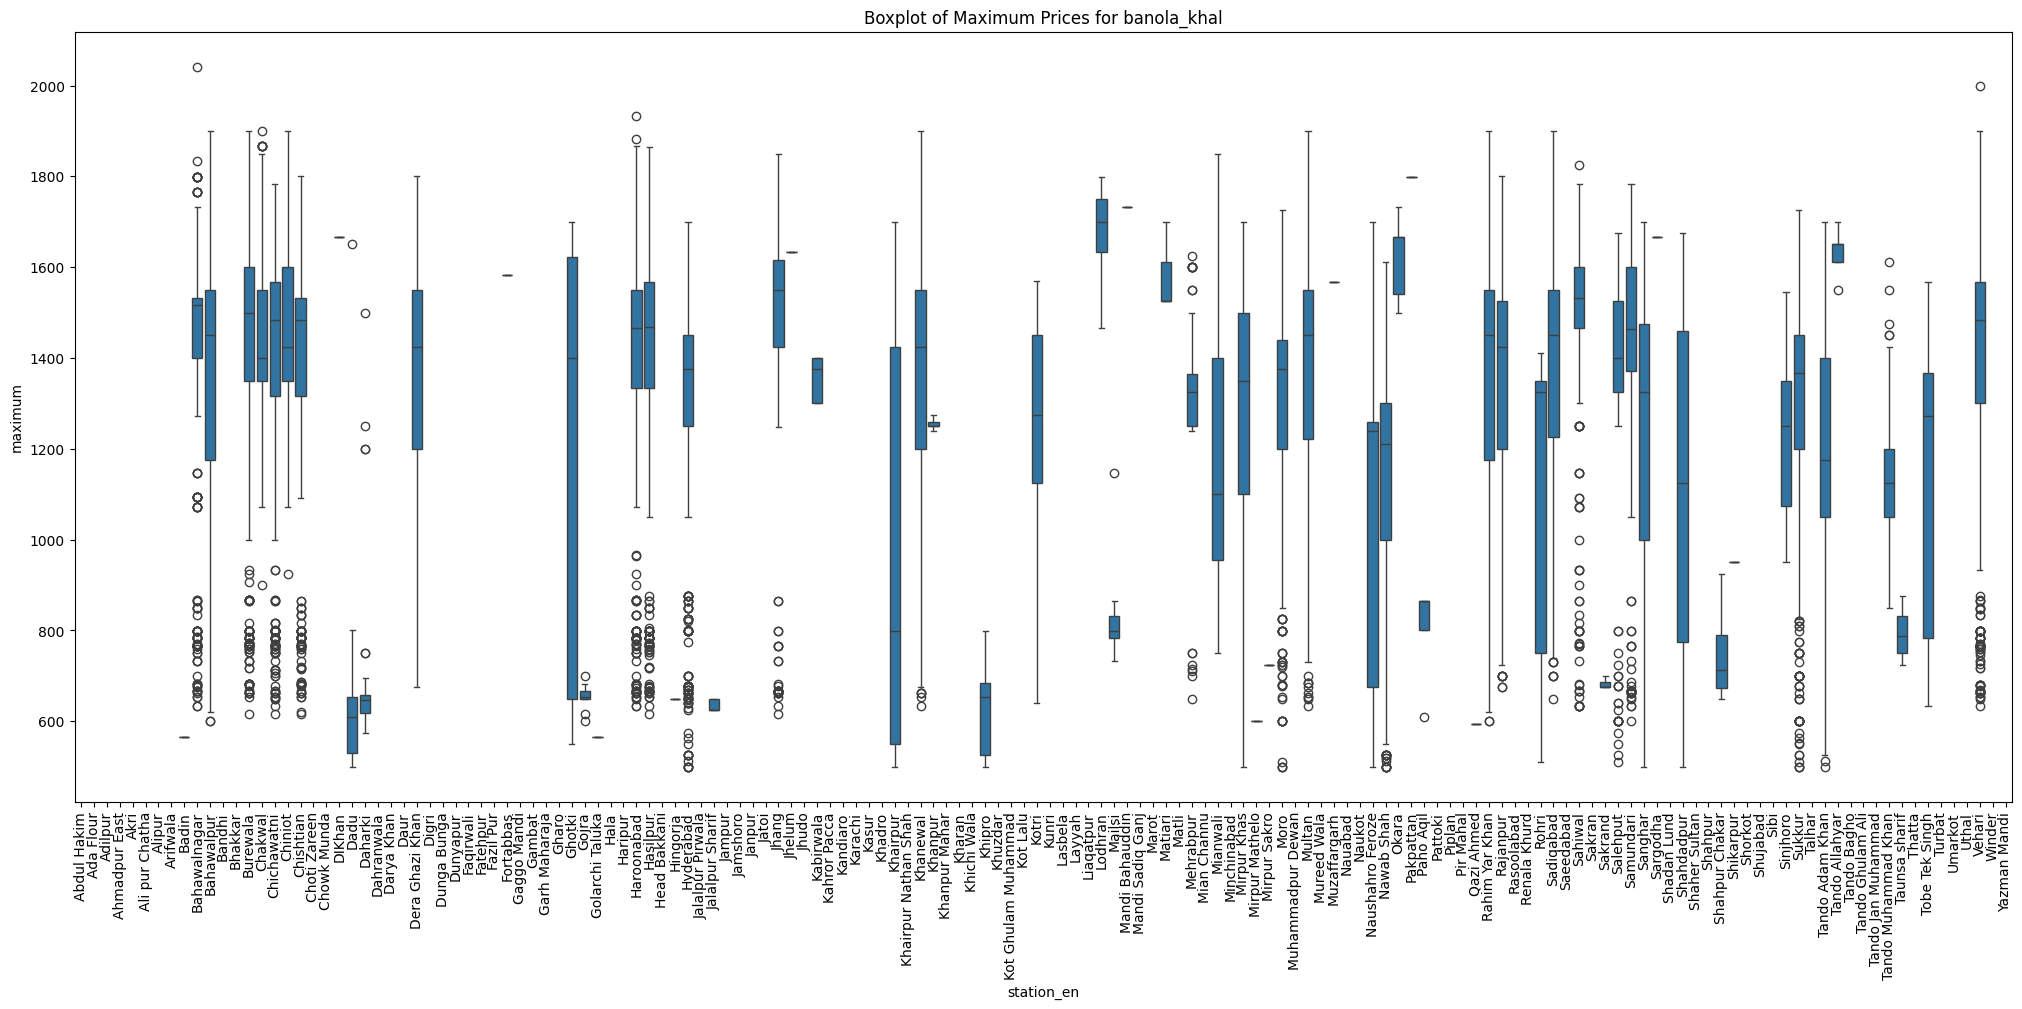

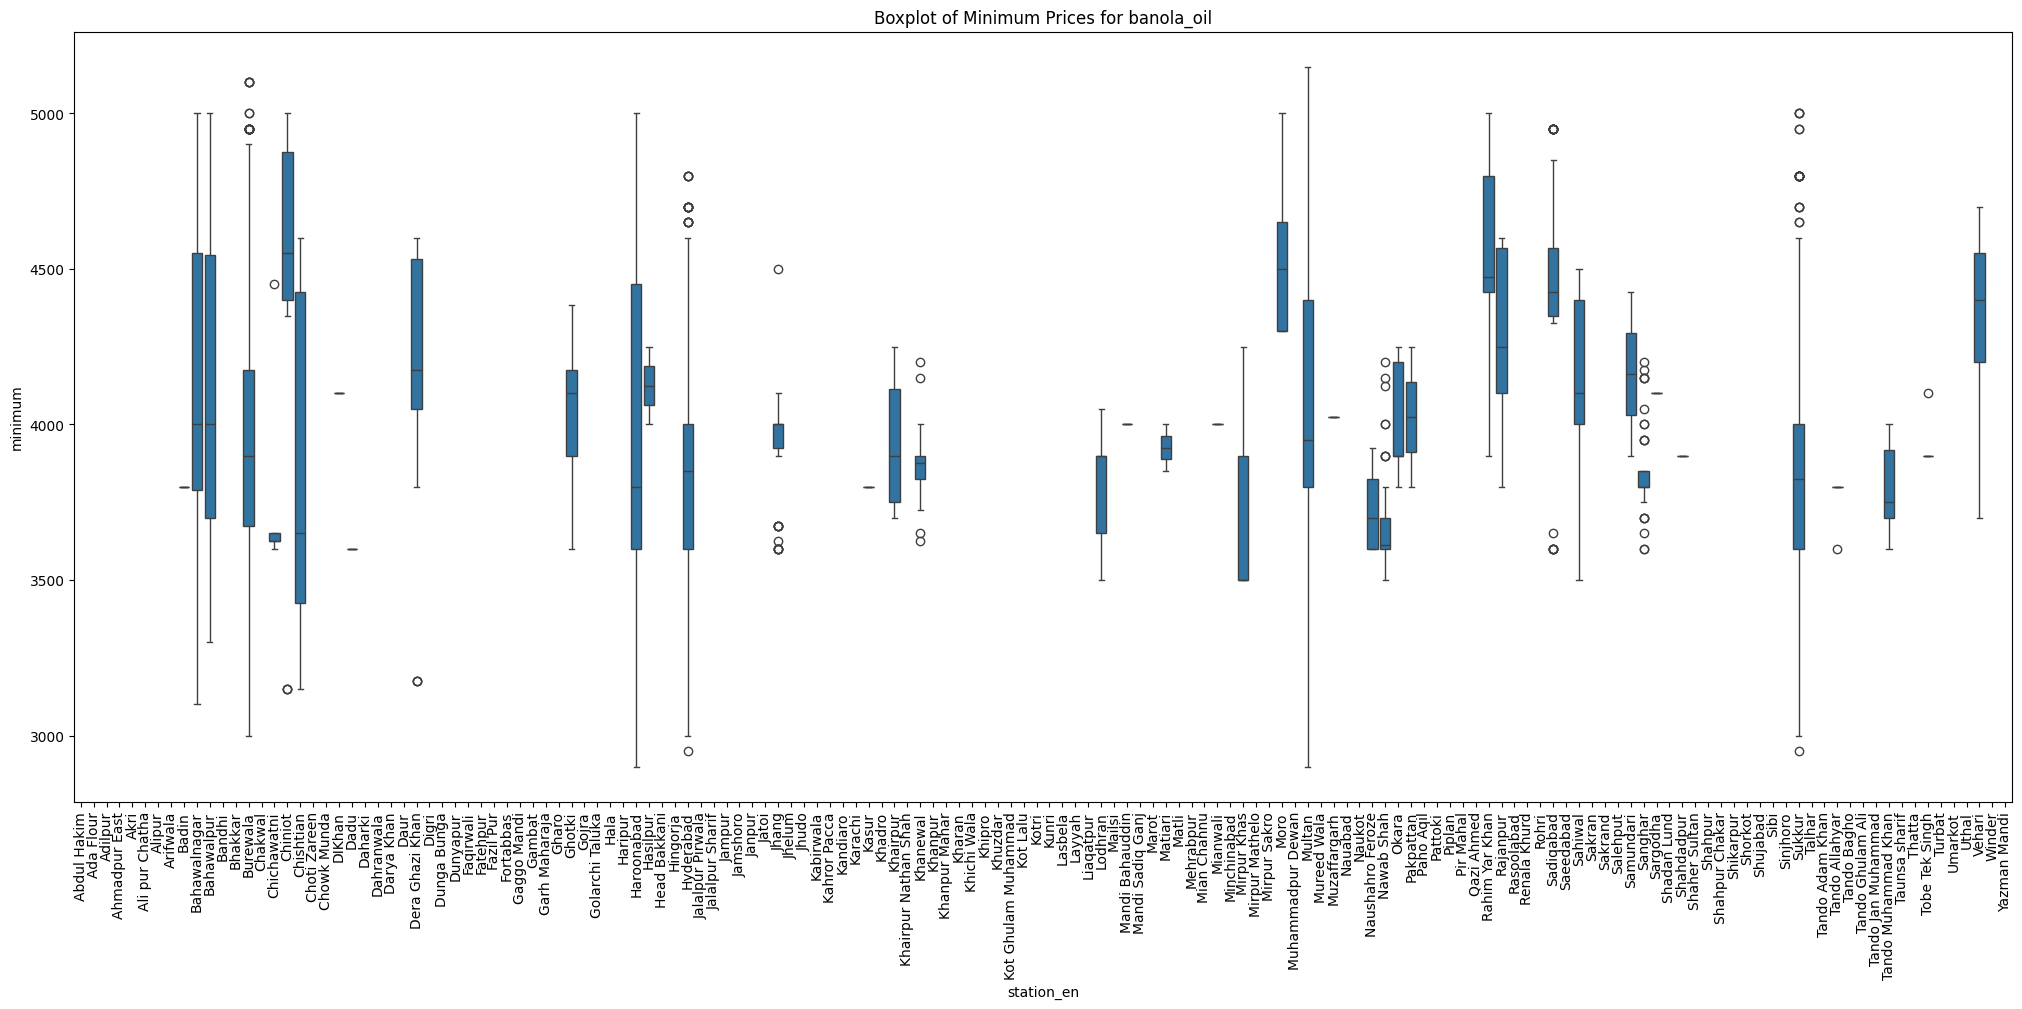

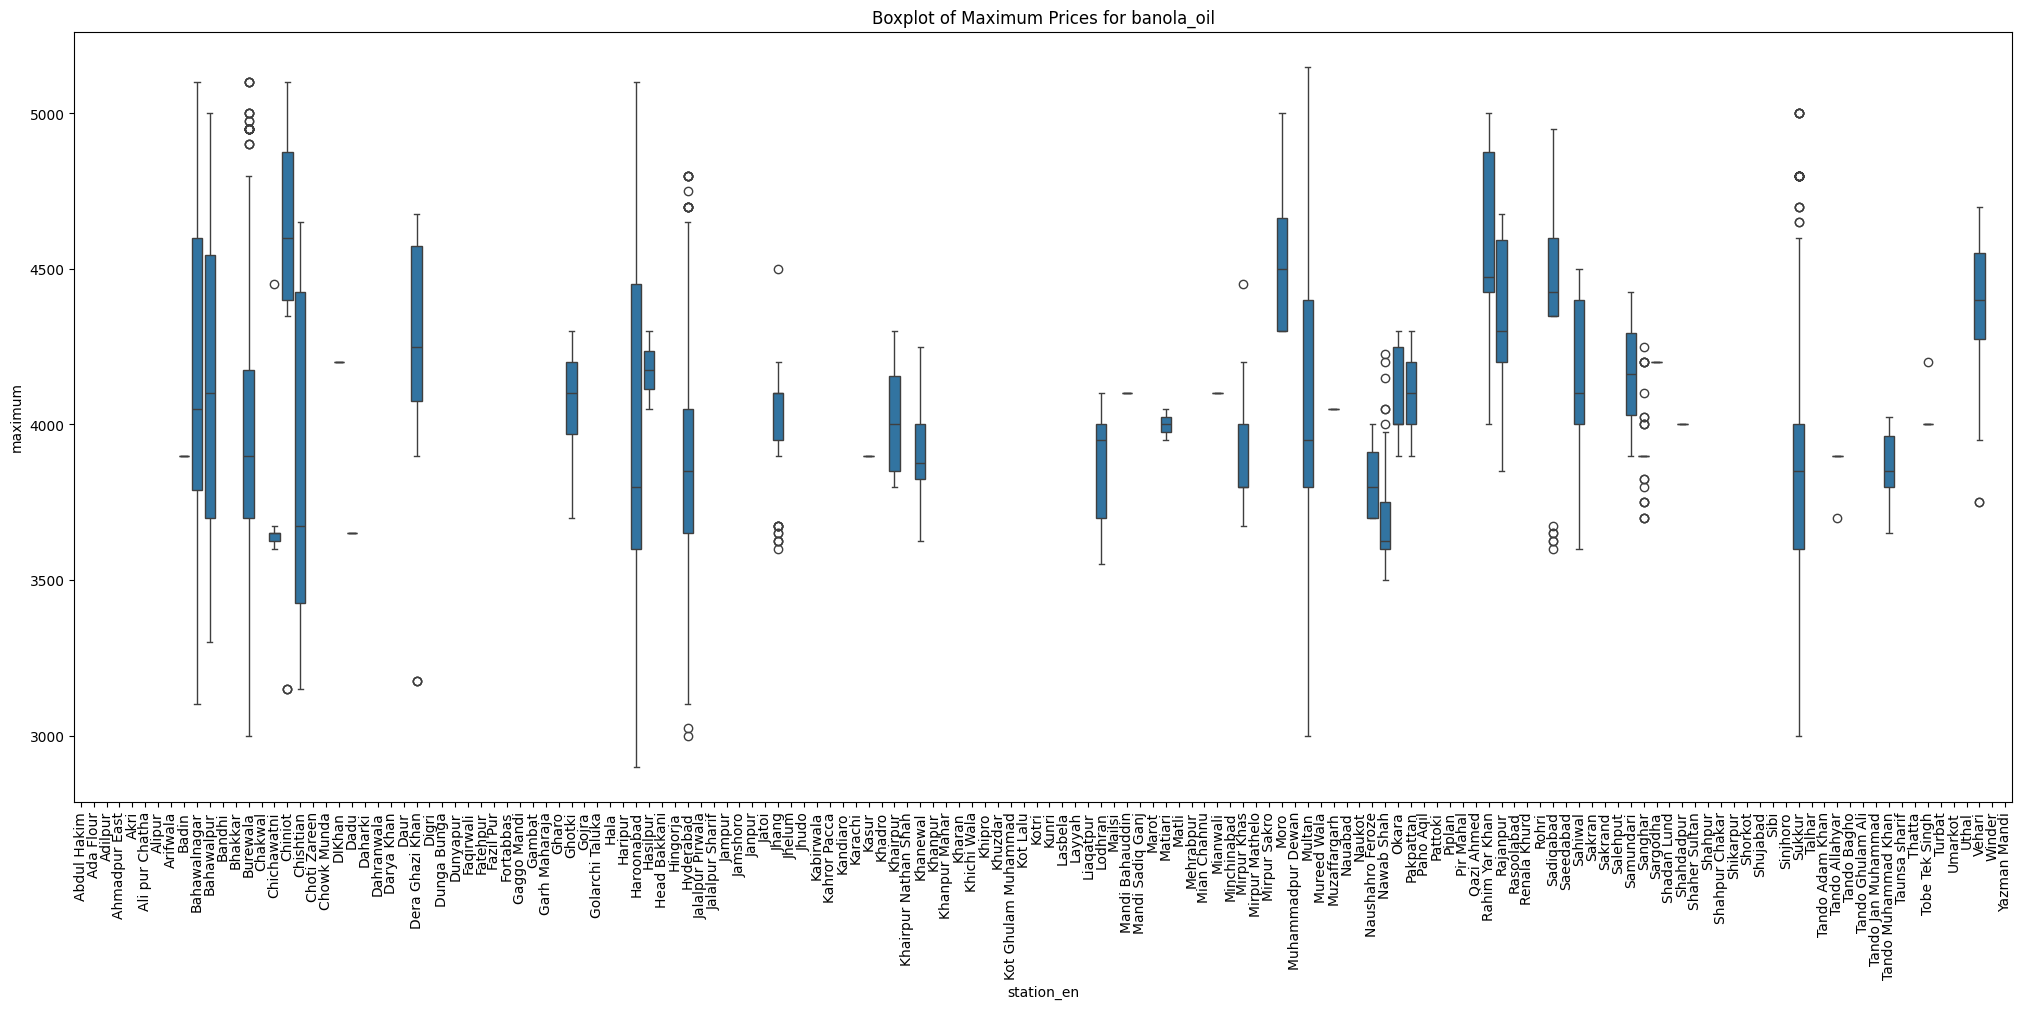

In [123]:
def box_plot(bp_name):
    filtered_data = data[data['by_product_en'] == bp_name]
    plt.figure(figsize=(25, 10))
    sns.boxplot(x='station_en', y='minimum', data=filtered_data)
    plt.title(f'Boxplot of Minimum Prices for {bp_name}')
    plt.xticks(rotation=90)
    plt.show()

    plt.figure(figsize=(25, 10))
    sns.boxplot(x='station_en', y='maximum', data=filtered_data)
    plt.title(f'Boxplot of Maximum Prices for {bp_name}')
    plt.xticks(rotation=90)
    plt.show()

for by_product in by_products:
    box_plot(by_product)

# **Feature Engineering**

## **Feature Addition**

In [124]:
data['quarter'] = data['date'].dt.quarter

station_byproduct_avg = data.groupby(['station_id', 'by_product_id'])[['minimum', 'maximum']].mean().rename(columns={'minimum': 'station_byproduct_avg_min', 'maximum': 'station_byproduct_avg_max'})
station_byproduct_avg['station_byproduct_avg_price'] = station_byproduct_avg[['station_byproduct_avg_min', 'station_byproduct_avg_max']].mean(axis=1)

data = data.drop(columns=['station_byproduct_avg_min', 'station_byproduct_avg_max', 'station_byproduct_avg_price'], errors='ignore')
data = data.merge(station_byproduct_avg, on=['station_id', 'by_product_id'], how='left')

data.head()

,date,product_id,product_en,by_product_id,by_product_en,province_id,lcu_id,province_en,district id,station_id,station_en,minimum,maximum,month_year,quarter,station_byproduct_avg_min,station_byproduct_avg_max,station_byproduct_avg_price
0,2012-01-02,1,Cotton,7,phutty,5,0,Sindh,4,26,Badin,1871.005917,2371.065089,2012-01,1,2548.142772,2722.391442,2635.267107
1,2012-01-02,1,Cotton,7,phutty,5,0,Sindh,19,107,Dadu,1800.000000,2100.000000,2012-01,1,2063.461538,2421.346154,2242.403846
2,2012-01-02,1,Cotton,7,phutty,5,0,Sindh,24,184,Ghotki,2000.000000,2300.000000,2012-01,1,2844.187831,2930.861183,2887.524507
3,2012-01-02,1,Cotton,7,phutty,5,0,Sindh,32,217,Hyderabad,1800.000000,2100.000000,2012-01,1,2520.899780,2743.237634,2632.068707
4,2012-01-02,1,Cotton,7,phutty,5,0,Sindh,36,447,Jamshoro,1800.000000,2100.000000,2012-01,1,2008.088235,2278.363568,2143.225902


## **Encoding Categorical Variables**

In [125]:
label_encoder = LabelEncoder()

for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])

data['month_year'] = label_encoder.fit_transform(data['month_year'].astype(str))

## **Feature Importance Analysis**

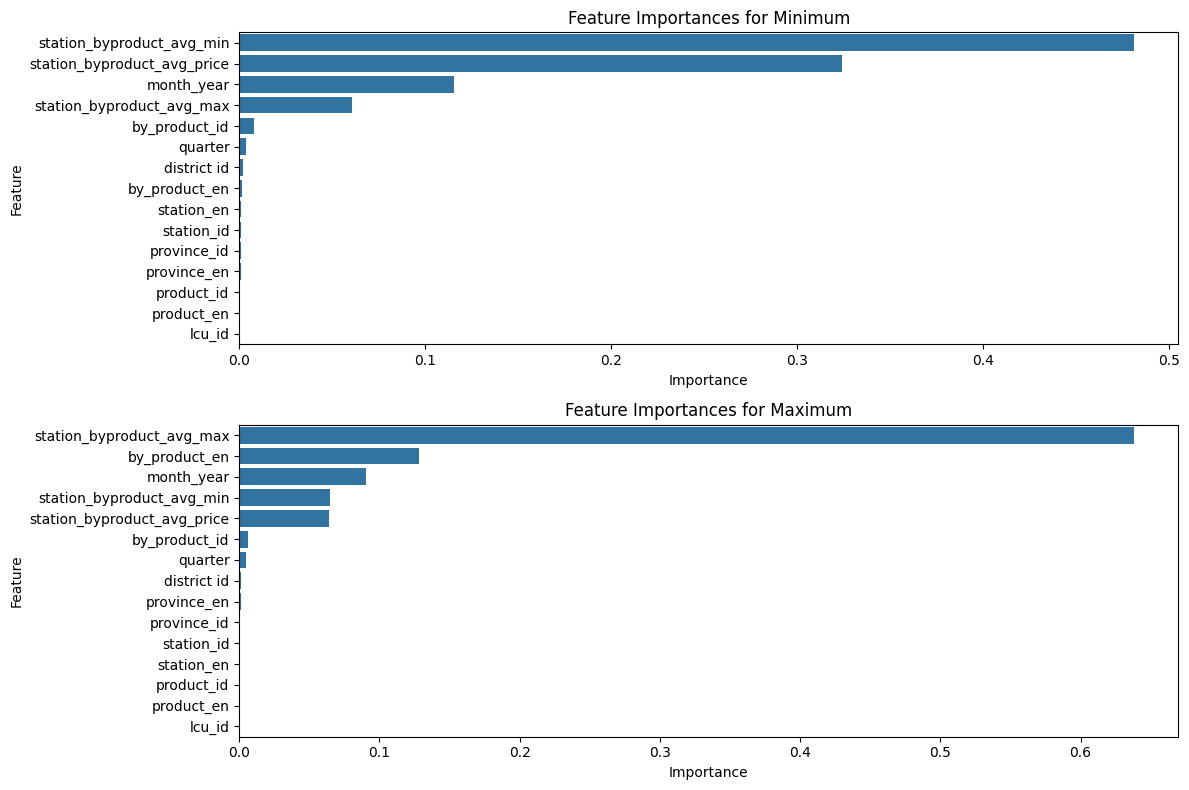

In [126]:
X = data.drop(columns=['date', 'minimum', 'maximum'])
y_min = data['minimum']
y_max = data['maximum']

rf_model_min = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_min.fit(X, y_min)

rf_model_max = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_max.fit(X, y_max)

feature_importances_min = rf_model_min.feature_importances_
feature_importances_max = rf_model_max.feature_importances_

feature_importance_df_min = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_min
}).sort_values(by='Importance', ascending=False)

feature_importance_df_max = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_max
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_min)
plt.title('Feature Importances for Minimum')
plt.subplot(2, 1, 2)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_max)
plt.title('Feature Importances for Maximum')
plt.tight_layout()
plt.show()


## **Select Important Features**

In [127]:
important_features = [
    'by_product_en', 
    'month_year', 
    'by_product_id', 
    'station_byproduct_avg_price',
    'station_byproduct_avg_min', 
    'station_byproduct_avg_max', 
    'quarter'
]

# Create the final dataset
final_data = data[important_features + ['minimum', 'maximum']]
final_data.head()

,by_product_en,month_year,by_product_id,station_byproduct_avg_price,station_byproduct_avg_min,station_byproduct_avg_max,quarter,minimum,maximum
0,3,0,7,2635.267107,2548.142772,2722.391442,1,1871.005917,2371.065089
1,3,0,7,2242.403846,2063.461538,2421.346154,1,1800.000000,2100.000000
2,3,0,7,2887.524507,2844.187831,2930.861183,1,2000.000000,2300.000000
3,3,0,7,2632.068707,2520.899780,2743.237634,1,1800.000000,2100.000000
4,3,0,7,2143.225902,2008.088235,2278.363568,1,1800.000000,2100.000000
